# Support Vector Machines (SVM)

Author: Sahngyoon Rhee

## Support Vector Machines - the concept

Support Vector Machines (SVM) are a set of supervised learning algorithms used for classification tasks. Although the original version of SVM was set up so that SVM can do binary classification, the algorithm can (and is) modified slightly so that it can also do multiclass classification and also regression tasks.

The main idea behind SVM is to find the optimal hyperplane that best separates the data points of different classes in a high-dimensional space. The hyperplane is chosen to maximize the margin, which is the distance between the hyperplane and the nearest data points from each class, known as support vectors. The high-dimensional space is chosen so that datapoints that are not linearly separable in the original space is separable in the higher-dimensional space.

### The Kernel Trick

The kernel trick is a technique used in SVM to handle non-linearly separable data. Instead of mapping the data to a higher-dimensional space explicitly, the kernel trick allows us to compute the dot product of the data points in the higher-dimensional space directly using a kernel function. This avoids the computational complexity of working in high-dimensional spaces.

Mathematically, if we have a mapping function $\phi(\mathbf{x})$ that maps the input data $\mathbf{x}$ to a higher-dimensional space, the kernel function $K(\mathbf{x}_i, \mathbf{x}_j)$ computes the dot product in that space:

$$K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i) \cdot \phi(\mathbf{x}_j)$$

### Different Types of Kernels

In theory, one can use any function $K$ on $\mathbb{R}^n \times \mathbb{R}^n$ that is symmetric and positive semi-definite can be a kernel. This result is from the [Mercer's Theorem](https://en.wikipedia.org/wiki/Mercer%27s_theorem#Generalizations). Here, we cover the most commonly used kernels.

#### Linear Kernel

The linear kernel is the simplest kernel function. It is used when the data is linearly separable, meaning that a straight line (or hyperplane in higher dimensions) can separate the classes. The linear kernel function is defined as:

$$K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j$$

In this case, the SVM finds the optimal hyperplane in the original feature space without any transformation.

#### Radial Basis Kernel

The Radial Basis Function (RBF) kernel, also known as the Gaussian kernel, is a popular choice for non-linear data. It maps the data into an infinite-dimensional space, allowing the SVM to create complex decision boundaries. The RBF kernel function is defined as:

$$K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma |\mathbf{x}_i - \mathbf{x}_j|^2\right)$$

where $\gamma$ is a parameter that controls the width of the Gaussian function. A smaller $\gamma$ value leads to a smoother decision boundary, while a larger $\gamma$ value allows for more complex boundaries.

#### Polynomial kernel

The polynomial kernel is another popular choice for non-linear data. It maps the data into a higher-dimensional space using polynomial functions. The polynomial kernel function is defined as:

$$K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d$$

where $c$ is a constant that controls the influence of higher-order terms, and $d$ is the degree of the polynomial. The polynomial kernel allows the SVM to create decision boundaries that are polynomial curves in the original feature space.

## SVM implimentation using Python

We have looked the theory behind SVMs. Here, we will use the `sklearn` package to implement SVM to the `iris` dataset.

In [1]:
# Required Packages
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the iris dataset
iris = datasets.load_iris()

In [3]:
print("Iris data set Description :: ", iris['DESCR'])

Iris data set Description ::  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

Notice that the `class correlation` for each of the feature variables is the [point-biserial correlation](https://www.statisticshowto.com/point-biserial-correlation/), which is an analog of the Pearson correlation coefficient for continuous independent variable and continuous depenent variable.

Now we shall take a look at the iris features and target classes.

In [4]:
n_sample_rows = 20
sample_indices = np.random.choice(iris['data'].shape[0], n_sample_rows, replace = False)

print(f"Iris feature data (a sample of {n_sample_rows} rows):\n")
print(iris['data'][sample_indices, :])

Iris feature data (a sample of 20 rows):

[[4.9 3.6 1.4 0.1]
 [6.  2.9 4.5 1.5]
 [4.4 3.  1.3 0.2]
 [6.4 3.2 5.3 2.3]
 [6.6 3.  4.4 1.4]
 [6.4 3.2 4.5 1.5]
 [6.4 2.7 5.3 1.9]
 [5.1 3.4 1.5 0.2]
 [5.8 2.6 4.  1.2]
 [6.2 3.4 5.4 2.3]
 [5.  3.5 1.3 0.3]
 [5.  2.  3.5 1. ]
 [5.7 3.  4.2 1.2]
 [5.  3.3 1.4 0.2]
 [6.7 3.  5.  1.7]
 [6.2 2.2 4.5 1.5]
 [5.5 4.2 1.4 0.2]
 [5.2 2.7 3.9 1.4]
 [5.1 3.3 1.7 0.5]
 [6.  2.7 5.1 1.6]]


In [5]:
print(f"Iris target variables (associated with the previous sample of {n_sample_rows} rows):\n")
print(iris['target'][sample_indices])

Iris target variables (associated with the previous sample of 20 rows):

[0 1 0 2 1 1 2 0 1 2 0 1 1 0 1 1 0 1 0 1]


We note that the class labels of $0, 1$, and $2$ represent the Iris-Setosa, Iris-Versicolour, and Iris-Virginica, respectively. For example, a row labeled $1$ is the observed data for an Iris-Virginica flower.

## Visualizing the Iris dataset

We shall look at the relationship between individual feature variables and the corresponding target classes.

### Visualizing relationship between sepal and target classes

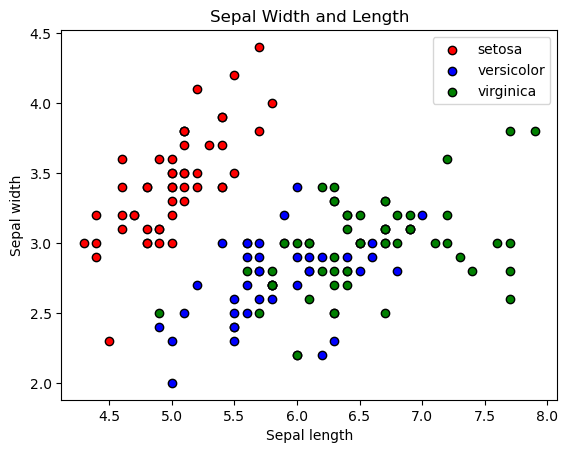

In [6]:
def visualize_sepal_data():
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    y = iris.target

    labels = iris.target_names
    colors = ['red', 'blue', 'green']

    for i, target in enumerate(labels):
        plt.scatter(X[y == i, 0], X[y == i, 1], 
                    c = colors[i], label = labels[i], edgecolor = 'k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Sepal Width and Length')
    plt.legend()
    plt.show()

visualize_sepal_data()

Notice that, because the iris dataset is a `Bunch` object that supports both dictionary-like indexing (e.g. `iris['data']`) and attribute-style indexing (e.g. `iris.data`), we can write `iris.data` to get the `data` from the the iris dataset.

We see a pattern here: flowers with wide sepal width and short sepal length tends to be setosas, and the rest are mixed between versicolor and virginica, even as the virginica class seems to have an almost-negligible higher average sepal width and somewhat-noticeable higher average sepal length.

We can create a similar graph for the petal length and width.

### Visualizing the relationship between petal and target classes

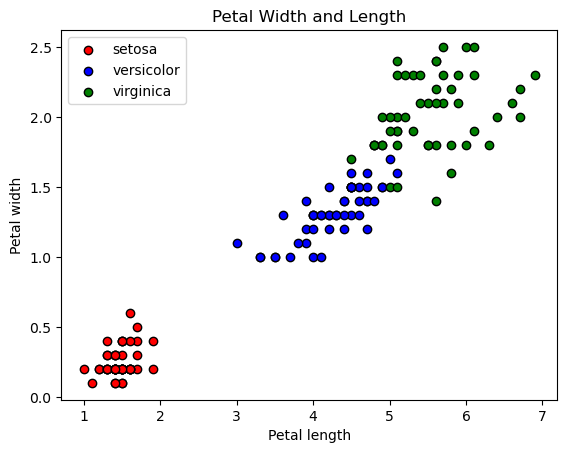

In [7]:
def visualize_petal_data():
    iris = datasets.load_iris()
    X = iris.data[:, -2:]
    y = iris.target

    labels = iris.target_names
    colors = ['red', 'blue', 'green']

    for i, target in enumerate(labels):
        plt.scatter(X[y == i, 0], X[y == i, 1], 
                    c = colors[i], label = labels[i], edgecolor = 'k')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Petal Width and Length')
    plt.legend()
    plt.show()

visualize_petal_data()

We see a clear pattern here: those with smaller petal width and/or length seems to be setosas, those with medium petals seems to be versicolor, and those with big petals seems to be virginica. We also see that setosas are easier to tell apart from the rest. This, along with our previous observations on the variations on sepal width and length, may suggest that, at least ostensibly, there may be closer genetic similarity between versicolor and virginica compared to that between setosa and the rest two.

## Modeling Different Kerenel SVM classifiers

We now shall model different kernel SVM classifiers considering only the Sepal length and width. We can, of course, use all four variables, but we choose only the two features so that we will be able to visualize the result.

### SVM classifiers using the Iris Petal features

In [8]:
X = iris.data[:, :2]
y = iris.target
C = 1.0 # SVM regularization parameter

# Support Vector Classifier (SVC) with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X,y)
# LinearSVC (linear kernel) - this is theoretically equivalent to svm.SVC with linear kernel, although the implementation is slightly different
lin_svc = svm.LinearSVC(C=C).fit(X,y)
# SVC with Gaussian Radial Basis Function (RBF) kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,y)
# SVC with polynomial of degree 3 kernel
poly_svc = svm.SVC(kernel='poly', degree = 3, C=C).fit(X,y)

C:\Users\srhee\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


A careful observation of our explanation of how SVM works will notice that the original theory of SVM is only for binary classification. So how does it work for multilevel classification?

The short answer is that we build multiple SVM and combine the results. Specifically, we build several SVMs to get a multiclass classification. There are two ways of doing this:

- One versus the Rest (OvR): In this approach, we train one SVM for each class, where each SVM distinguishes between one class and all the other classes combined. For a dataset with $K$ classes, we train $K$ number of SVMs. During prediction, the SVM that outputs the highest confidence score determines the class of the input data point.
- One versus One (OvO): In this approach, we train an SVM for every pair of classes; that is, for a dataset with $K$ classes, we train $\binom{K}{2} = \frac{K(K-1)}{2}$ SVMs. Each SVM is trained to distinguish between two classes. During prediction, each SVM casts a vote for one of the two classes, and the class with the most votes is chosen as the final prediction. The disadvantage of OvO is that it becomes computationally expensive when we have many classes to classify, as the number of SVMs we need to train grows quadratically as the number of classes of the targel label increases.

The default choice for svm.SVC is the OvO method, and the default choice for svm.LinearSVC is OvR method. Thus, for a classification task with a lot of classes and datapoints, `svm.LinearSVC` may be a more efficient choice, while `svm.SVC` with a nonlinear kernel (such as `rbf`) may be more suitable for a classification task that does not require huge computation. It should be noted that, at least for `svm.SVC`, we can manually change the method from OvO to OvR method by setting the keyword ... `decision_function_shape` to `ovr`.

There are [several SVC algorithms that fall under `sklearn.svm` module.](https://scikit-learn.org/stable/api/sklearn.svm.html). `svm.LinearSVC` is the support vector machine with linear kernel, and is theoretically equivalent to the `svm.SVC(kernel = 'linear' ...)`, although the implementation is slightly different. `svm.LinearSVC` is more computationally efficient and scalable compared to `svm.SVC` with linear kernels. You can read more about it in [this stack exchange post](https://stackoverflow.com/questions/27912872/what-is-the-difference-between-svc-and-svm-in-scikit-learn).

Now we shall visualize each kernel SVM classifiers to understand how well the classifiers fit the train features.

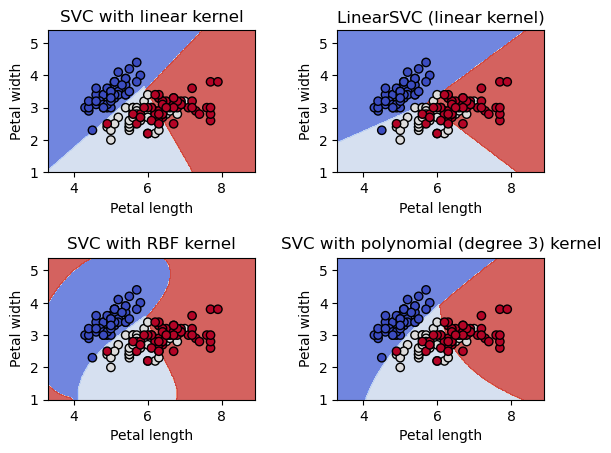

In [9]:
# define the step size in the mesh
mesh_step_size = .02

# Create a mesh to plot our result
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                     np.arange(y_min, y_max, mesh_step_size))

# title for the plot
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # plot the decision boundary
    plt.subplot(2,2,i+1)
    plt.title(titles[i])
    plt.subplots_adjust(wspace = .4, hspace = .6)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha = .8, cmap = plt.cm.coolwarm)

    # plot the training points
    plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.coolwarm, edgecolor='k')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks()
    plt.yticks()

plt.show()

The above is the visualization of the SVC classifier with different kernels and/or methods. Notice that the linear boundaries by `svm.SVC(kernel = 'linear')` and the lineary boundaries by `svm.LinearSVC` is different.

Next, we shall do the same thing with sepal data.

### SVM classifiers using the Iris Sepal features

Notice that the code is identical as above, except for the definition and label of the training set.

In [10]:
# defining the training set feature variables and target variable
X = iris.data[:, -2:]
y = iris.target
C = 1.0 # SVM regularization parameter

# Support Vector Classifier (SVC) with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X,y)
# LinearSVC (linear kernel) - this is theoretically equivalent to svm.SVC with linear kernel, although the implementation is slightly different
lin_svc = svm.LinearSVC(C=C).fit(X,y)
# SVC with Gaussian Radial Basis Function (RBF) kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,y)
# SVC with polynomial of degree 3 kernel
poly_svc = svm.SVC(kernel='poly', degree = 3, C=C).fit(X,y)

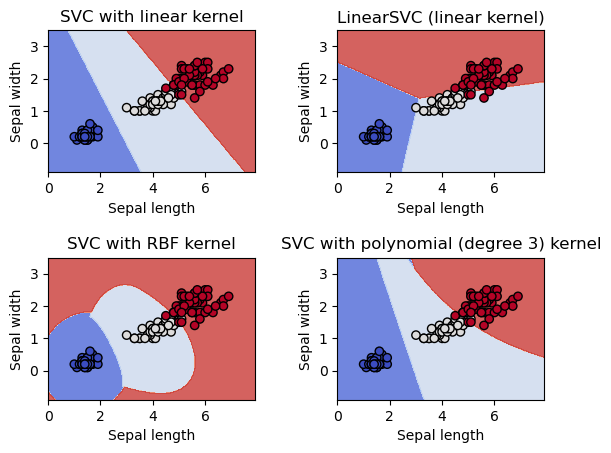

In [11]:
# define the step size in the mesh
mesh_step_size = .02

# Create a mesh to plot our result
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                     np.arange(y_min, y_max, mesh_step_size))

# title for the plot
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # plot the decision boundary
    plt.subplot(2,2,i+1)
    plt.title(titles[i])
    plt.subplots_adjust(wspace = .4, hspace = .6)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha = .8, cmap = plt.cm.coolwarm)

    # plot the training points
    plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.coolwarm, edgecolor = 'k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks()
    plt.yticks()

plt.show()    